In [1]:
# Project Gi

import cv2
import mediapipe as mp
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
# Load the model
#model = load_model('model.h5')
model = keras.models.load_model("C:/Users/Antec/Desktop/Python_Kurs/Bootcamp/ML2/Chollet/feature_extraction.keras")
face_detection = mp.solutions.face_detection.FaceDetection(model_selection=1)
# Define mediapipe Face detector

In [7]:
conv_base = keras.applications.vgg16.VGG16(
weights="imagenet",
include_top=False,
input_shape=(180, 180, 3))

In [8]:
# Detection function

def get_detection(frame):

    height, width, channel = frame.shape

    # Convert frame BGR to RGB colorspace

    imgRGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # Detect results from the frame
    
    result = face_detection.process(imgRGB)

    try:
        for count, detection in enumerate(result.detections):

            #print(detection)

        
            # Extract bounding box information 
            
            box = detection.location_data.relative_bounding_box

            x, y, w, h = int(box.xmin*width), int(box.ymin * height), int(box.width*width), int(box.height*height)
            
    # If detection is not available then pass 
    except:
        pass

    return x, y, w, h

    
    

In [10]:
CATEGORIES = ['mask', 'no_mask']
cap = cv2.VideoCapture(0)
while True:
    _, frame = cap.read()
    img = frame.copy()

    try:    
        x, y, w, h = get_detection(frame)

        crop_img = img[y:y+h, x:x+w]

        crop_img = cv2.resize(crop_img, (180, 180))
        #print("Frame after cropping:", crop_img.shape)
        crop_img = np.expand_dims(crop_img, axis=0)
        #print("Frame after adding dim:", crop_img.shape)
        # get the prediction from the model.

        #prediction = model.predict(crop_img)
        prediction = model.predict(conv_base.predict(crop_img))
 
        index = int(prediction[0][0])                           



        res = CATEGORIES[index]
        

        if index == 0:
            color = (0, 255, 0)
        else:
            color = (0, 0, 255)
        cv2.rectangle(frame, (x, y), (x+w, y+h), color, 1)
        cv2.putText(frame, res, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX,
                                         0.8, color, 1, cv2.LINE_AA)

    except:
        pass
    
    cv2.imshow("frame", frame)
    if cv2.waitKey(1) == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

uint8
(1, 180, 180, 3)


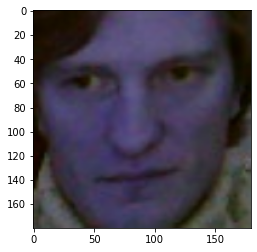

In [12]:
from matplotlib import pyplot



print(crop_img.dtype)
print(crop_img.shape)
pyplot.imshow(crop_img.reshape(180,180,3))
pyplot.show()


In [54]:
test = crop_img.reshape(1,180,180,3)
test = conv_base.predict(test)
print(test.shape)
print(model.predict(test))
#model.predict(conv_base.predict(crop_img.reshape(1,180,180,3)))

(1, 5, 5, 512)
[[1.]]


In [5]:
from matplotlib import image
from matplotlib import pyplot

uint8
(800, 1200, 3)


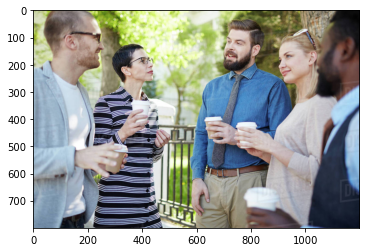

In [6]:
ima = image.imread("C:/Users/Antec/Desktop/Python_Kurs/Bootcamp/ML2/Chollet/external-content.duckduckgo.com.jpg",0)

print(ima.dtype)
print(ima.shape)
pyplot.imshow(ima)
pyplot.show()


In [2]:

ima = ima.astype(np.uint8)
ima= ima[:,:,:3]
ima = cv2.resize(ima, (180, 180))

NameError: name 'ima' is not defined

In [ ]:
ima.shape

NameError: name 'ima' is not defined

In [ ]:
test_res = face_detection.process(ima)

In [ ]:
print(len(test_res.detections))
print(len(test_res.detections[0]))
print(test_res.detections[0])

In [26]:
detects = test_res.detections